<a href="https://colab.research.google.com/github/Musungu-Maureen/IP_WEEK_13/blob/main/Copy_of_Maureen_Musungu_Week_12_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ad Click Analysis

## Defining the Question

### a) Specifying the Data Analytic Question

Identifying which individuals are most likely to click on the cryptography course ads on the blog. 




### b) Defining the Metric for Success

The project will be deemed successful if it is able to identify the customers that are most likely to click on the cryptography course ads. 

### c) Understanding the Context

A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads. 

### d) Experimental Design

1. Data Cleaning by 
2. Perform  univariate and bivariate analysis.
3. Providing a conclusion and recommendation

### e) Data Relevance

The data availed is relevant for this study. 

## Loading Relevant packages

In [3]:
# load data.table package
library("data.table")
# load tidyverse package
library("tidyverse")
# install cutr package from github
devtools::install_github("moodymudskipper/cutr")
# load cutr package
library(cutr)
# install modeest package form github
devtools::install_github("paulponcet/modeest")
# load modeest package
library(modeest)
# install moments package
install.packages('moments')
# load moments package
library(moments)
# install janitor package
install.packages('janitor')
# load janitor package 
library(janitor)


Skipping install of 'cutr' from a github remote, the SHA1 (7b8e9cdc) has not changed since last install.
  Use `force = TRUE` to force installation

Skipping install of 'modeest' from a github remote, the SHA1 (a168f944) has not changed since last install.
  Use `force = TRUE` to force installation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Reading the data

In [5]:
# loading the csv file 
data <- read.csv(file = '/content/advertising.csv')

In [6]:
# preview the first six records in the dataset
head(data)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [7]:
# Checking the number of rows and columns in our data

dim(data)

[1] 1000   10

There are 1000 rows and 10 columns in our data.

In [8]:
# Checking the data types of the columns
str(data)

'data.frame':	1000 obs. of  10 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Ad.Topic.Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : chr  "2016-03-27 00:53:11" "2016-04-04 01:39:02" "2016-03-13 20:35:42" "2016-01-10 02:31:19" ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


"Clicked on Ad" and "Male" are categorical variables even though they have numeric values. Their data types will be changed in the data cleaning section. 

## Tidying the Data

In [9]:
head(data, 2)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0


**Column names**

In [8]:
# Changing the column names to lower case
names(data) <- tolower(names(data))
colnames(data)

[1] "daily.time.spent.on.site" "age"                     
 [3] "area.income"              "daily.internet.usage"    
 [5] "ad.topic.line"            "city"                    
 [7] "male"                     "country"                 
 [9] "timestamp"                "clicked.on.ad"

In [9]:
# renaming the 'male' column to 'gender'
names(data)[names(data) == "male"] <- "gender"

# replacing the ones and zeros in 'gender' column with 'male' and 'female' using the ifelse() function
data$gender <- ifelse(data$gender == 1,"Male", 'Female')

**Duplicates**

In [10]:
# Checking for duplicated entries
anyDuplicated(data)

[1] 0

There are no duplicated entries in the data. 

**Missing Data**

In [11]:
# Checking for missing values

colSums(is.na(data))

daily.time.spent.on.site                      age              area.income 
                       0                        0                        0 
    daily.internet.usage            ad.topic.line                     city 
                       0                        0                        0 
                  gender                  country                timestamp 
                       0                        0                        0 
           clicked.on.ad 
                       0

There are no missing values in the data. 

**Outliers**

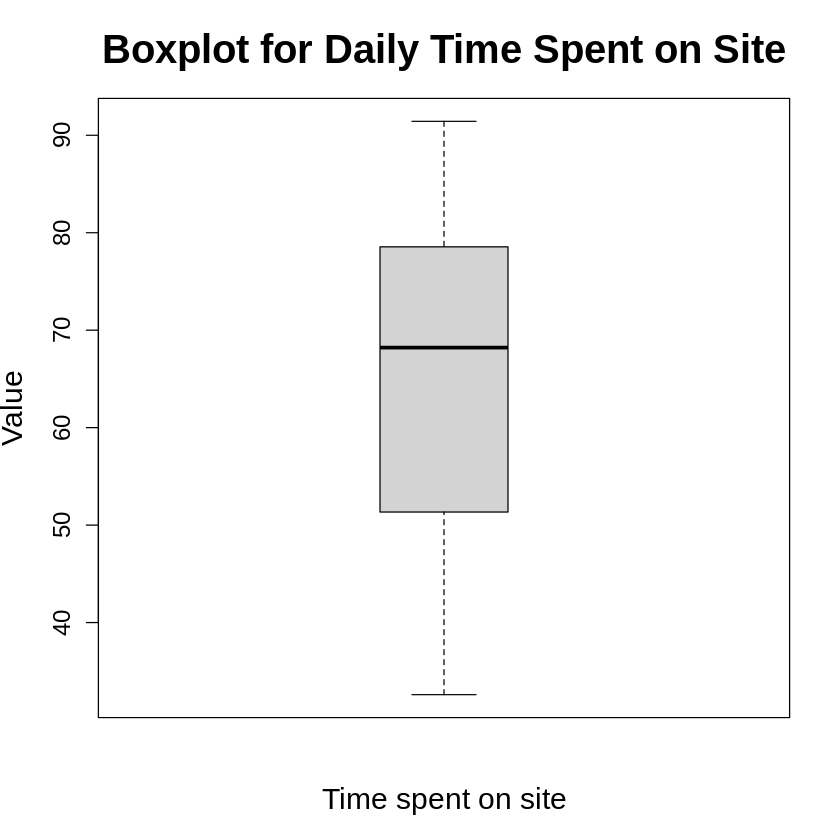

In [14]:
# Checking for outliers in the "daily.time.spent.on.site" column
boxplot(data$daily.time.spent.on.site, main="Boxplot for Daily Time Spent on Site", xlab = "Time spent on site", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)


There are no outliers in the 'daily.time.spent.on.site' column

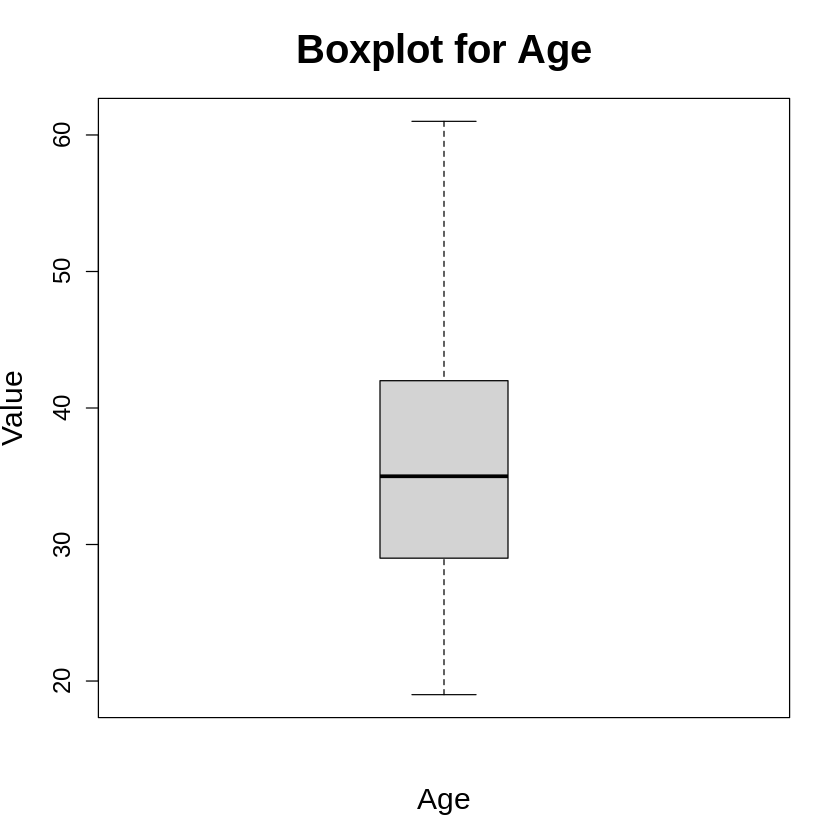

In [15]:
# plot a boxplot to check for outliers in the 'age' column
boxplot(data$age, main="Boxplot for Age", xlab = "Age", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

There are no outliers in the 'age' column

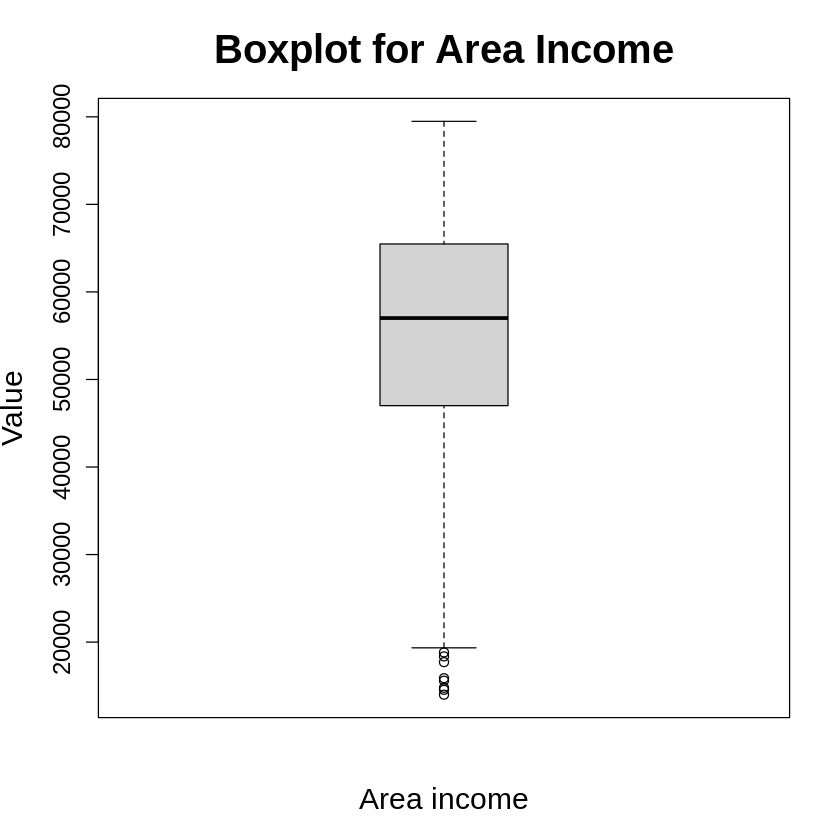

In [16]:
# Checking for outliers in the 'area.income' column
boxplot(data$area.income, main="Boxplot for Area Income", xlab = "Area income", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

These column has some outliers but we shall work with them as is, since we presume them to be accurate values. 



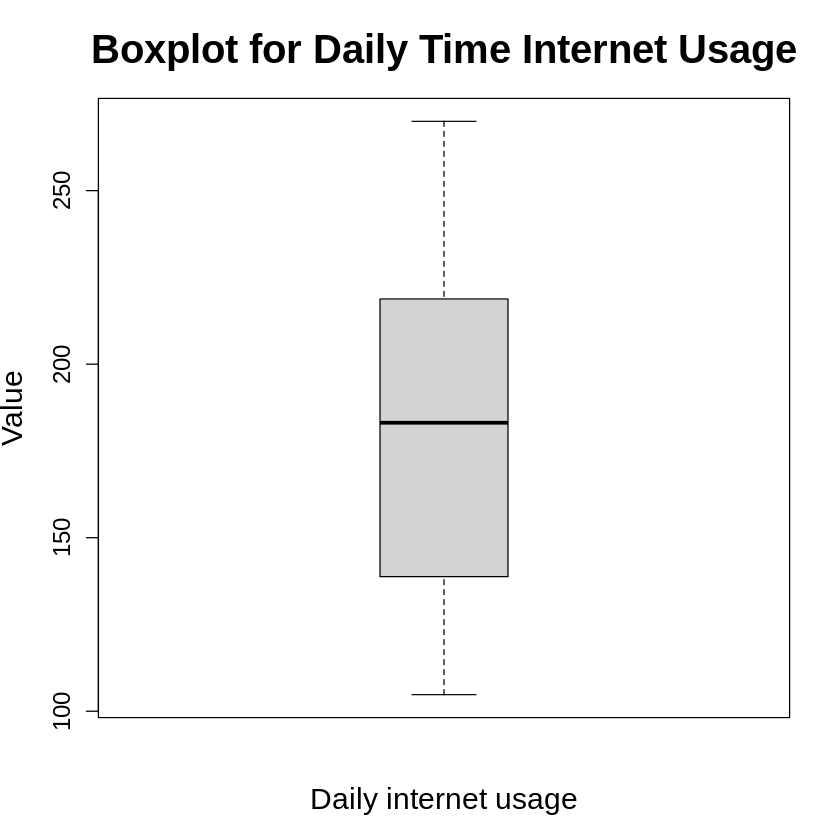

In [17]:
# Checking for outliers in the 'daily.internet.usage' column
boxplot(data$daily.internet.usage, main="Boxplot for Daily Time Internet Usage", xlab = "Daily internet usage", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)


There are no outliers in the 'daily.internet.usage' column.

**Anomalies**

In [18]:
# checking for anomalies in the 'city' column  
print(unique(data$city))

  [1] "Wrightburgh"             "West Jodi"              
  [3] "Davidton"                "West Terrifurt"         
  [5] "South Manuel"            "Jamieberg"              
  [7] "Brandonstad"             "Port Jefferybury"       
  [9] "West Colin"              "Ramirezton"             
 [11] "West Brandonton"         "East Theresashire"      
 [13] "West Katiefurt"          "North Tara"             
 [15] "West William"            "New Travistown"         
 [17] "West Dylanberg"          "Pruittmouth"            
 [19] "Jessicastad"             "Millertown"             
 [21] "Port Jacqueline"         "Lake Nicole"            
 [23] "South John"              "Pamelamouth"            
 [25] "Harperborough"           "Port Danielleberg"      
 [27] "West Jeremyside"         "South Cathyfurt"        
 [29] "Palmerside"              "West Guybury"           
 [31] "Phelpschester"           "Lake Melindamouth"      
 [33] "North Richardburgh"      "Port Cassie"            
 [35] "New Tho

There are no anomalies in the 'city' column.

In [19]:
# checking for anomalies in the 'ad.topic.line' column  
print(unique(data$ad.topic.line))

   [1] "Cloned 5thgeneration orchestration"                     
   [2] "Monitored national standardization"                     
   [3] "Organic bottom-line service-desk"                       
   [4] "Triple-buffered reciprocal time-frame"                  
   [5] "Robust logistical utilization"                          
   [6] "Sharable client-driven software"                        
   [7] "Enhanced dedicated support"                             
   [8] "Reactive local challenge"                               
   [9] "Configurable coherent function"                         
  [10] "Mandatory homogeneous architecture"                     
  [11] "Centralized neutral neural-net"                         
  [12] "Team-oriented grid-enabled Local Area Network"          
  [13] "Centralized content-based focus group"                  
  [14] "Synergistic fresh-thinking array"                       
  [15] "Grass-roots coherent extranet"                          
  [16] "Persistent demand

There are no anomalies in the 'ad.topic.line' column. 

In [20]:
# check for anomalies in the 'male' column by scrutinizing its unique values 
print(unique(data$gender))

[1] "Female" "Male"  


There are only 2 unique values in the male column and no entry has an anomaly. 

In [21]:
# Checking for anomalies in the country column
print(unique(data$country))

  [1] "Tunisia"                                            
  [2] "Nauru"                                              
  [3] "San Marino"                                         
  [4] "Italy"                                              
  [5] "Iceland"                                            
  [6] "Norway"                                             
  [7] "Myanmar"                                            
  [8] "Australia"                                          
  [9] "Grenada"                                            
 [10] "Ghana"                                              
 [11] "Qatar"                                              
 [12] "Burundi"                                            
 [13] "Egypt"                                              
 [14] "Bosnia and Herzegovina"                             
 [15] "Barbados"                                           
 [16] "Spain"                                              
 [17] "Palestinian Territory"           

There are no anomalies in the 'country' column. 

In [22]:
# checking for anomalies in the 'clicked.on.ad' column  
print(unique(data$clicked.on.ad))

[1] 0 1


There are 2 unique values and no anomalies in the 'clicked.on.ad' column.

In [23]:
# replace the ones and zeros in 'clicked_on_ad' column with 'yes' and 'no' using the ifelse() function
data$clicked.on.ad <- ifelse(data$clicked.on.ad == 1,"Yes", 'No')
print(unique(data$clicked.on.ad))

[1] "No"  "Yes"


In [24]:
head(data,2)

,daily.time.spent.on.site,age,area.income,daily.internet.usage,ad.topic.line,city,gender,country,timestamp,clicked.on.ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:11,No
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:02,No


## Feature Engineering

In [12]:
# Extracting 'month', 'day' and 'hour' data from 'timestamp' column
data$month <- format(as.POSIXct(data$timestamp, format="%Y-%m-%d %H:%M:%S"), "%m")
data$time.of.month <- format(as.POSIXct(data$timestamp, format="%Y-%m-%d %H:%M:%S"), "%d")
data$time.of.day <- format(as.POSIXct(data$timestamp, format="%Y-%m-%d %H:%M:%S"), "%H")

In [13]:
# categorize the values in the 'part_of_month' column using ifelse() function 
data$time.of.month <- ifelse(data$time.of.month >='01' & data$time.of.month <= '10' ,"Early",
              ifelse(data$time.of.month >='11' & data$time.of.month <= '20',"Mid", "Late"))

In [14]:
# categorize the values in the 'part_of_day' column
data$time.of.day <- ifelse(data$time.of.day >='00' & data$time.of.day <= '02' ,"Late night",
              ifelse(data$time.of.day >='03' & data$time.of.day <= '05',"Towards morning",
              ifelse(data$time.of.day >='06' & data$time.of.day <= '08',"Early morning",
              ifelse(data$time.of.day >='09' & data$time.of.day <= '11',"Late morning",
              ifelse(data$time.of.day >='12' & data$time.of.day <= '14',"Early afternoon",
              ifelse(data$time.of.day >='15' & data$time.of.day <= '17',"Late afternoon",
              ifelse(data$time.of.day >='18' & data$time.of.day <= '20',"Evening", "Night")))))))
              

In [15]:
# drop irrelevant columns
setDT(data)[, c( "timestamp", "city", "ad.topic.line", "clicked_on_ad") := NULL]

Warning message in `[.data.table`(setDT(data), , `:=`(c("timestamp", "city", "ad.topic.line", :
“Column 'clicked_on_ad' does not exist to remove”


In [16]:
# preview the first few records of the dataset
head(data)

daily.time.spent.on.site,age,area.income,daily.internet.usage,gender,country,clicked.on.ad,month,time.of.month,time.of.day
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
68.95,35,61833.90,256.09,Female,Tunisia,0,03,Late,Late night
80.23,31,68441.85,193.77,Male,Nauru,0,04,Early,Late night
69.47,26,59785.94,236.50,Female,San Marino,0,03,Mid,Evening
74.15,29,54806.18,245.89,Male,Italy,0,01,Early,Late night
68.37,35,73889.99,225.58,Female,Iceland,0,06,Early,Towards morning
59.99,23,59761.56,226.74,Male,Norway,0,05,Mid,Early afternoon


## Univariate analysis


### Measures of Central Tendency

**Daily time spent on site**

In [17]:
# computing the measures of central tendency of values in 'daily.time.spent.on.site' column
cat("Mean:", mean(data$daily.time.spent.on.site), '\n')
cat("Median:", median(data$daily.time.spent.on.site), '\n')
cat("Mode:", mfv(data$daily.time.spent.on.site), '\n')
cat("Number of modal values:", length(mfv(data$daily.time.spent.on.site)))

Mean: 65.0002 
Median: 68.215 
Mode: 62.26 75.55 77.05 78.76 84.53 
Number of modal values: 5

**Age**

In [31]:
# compute the measures of central tendency of values in 'age' column
cat("Mean:", mean(data$age), '\n')
cat("Median:", median(data$age), '\n')
cat("Mode:", mfv(data$age), '\n')


Mean: 36.009 
Median: 35 
Mode: 31 


**Area income**

In [32]:
# compute the measures of central tendency of values in 'area_income' column
cat("Mean:", mean(data$area.income), '\n')
cat("Median:", median(data$area.income), '\n')
cat("Mode:", mfv(data$area.income), '\n')
cat("Number of modal values:", length(mfv(data$area.income)))

Mean: 55000 
Median: 57012.3 
Mode: 13996.5 14548.06 14775.5 15598.29 15879.1 17709.98 18368.57 18819.34 19345.36 19991.72 20592.99 20856.54 21644.91 21773.22 22205.74 22456.04 22473.08 23410.75 23821.72 23936.86 23942.61 23975.35 24030.06 24078.93 24316.61 24593.33 24852.9 25371.52 25408.21 25583.29 25598.75 25603.93 25682.65 25686.34 25739.09 25767.16 26023.99 26130.93 27073.27 27086.4 27241.11 27262.51 27508.41 27964.6 28019.09 28028.74 28186.65 28210.03 28265.81 28271.84 28275.48 28357.27 28387.42 28495.21 28679.93 29359.2 29398.61 29727.79 29875.8 30227.98 30487.48 30726.26 30976 31072.44 31087.54 31092.93 31215.88 31265.75 31281.01 31343.39 31523.09 31947.65 31998.72 32006.82 32252.38 32536.98 32549.95 32593.59 32635.7 32689.04 32708.94 32847.53 33147.19 33239.2 33258.09 33293.78 33502.57 33553.9 33601.84 33813.08 33951.63 33987.27 34127.21 34191.13 34191.23 34309.24 34418.09 34886.01 34903.67 34942.26 35253.98 35349.26 35350.55 35466.8 35521.88 35684.82 35764.49 36037.33 36424.9

**Daily internet usage**

In [33]:
# compute the measures of central tendency of values in 'daily.internet.usage' column
cat("Mean: ", mean(data$daily.internet.usage), '\n')
cat("Median: ", median(data$daily.internet.usage), '\n')
cat("Mode: ", mfv(data$daily.internet.usage), '\n')
cat("Number of modal values: ", length(mfv(data$daily.internet.usage)))

Mean:  180.0001 
Median:  183.13 
Mode:  113.53 115.91 117.3 119.3 120.06 125.45 132.38 135.24 136.18 138.35 158.22 161.16 162.44 164.25 167.22 169.4 178.75 182.65 190.95 194.23 201.15 211.87 214.42 215.18 219.72 222.11 223.16 228.81 230.36 234.75 235.28 236.96 247.05 256.4 
Number of modal values:  34

### Measures of Dispersion

**Daily time spent on site**

In [34]:
# computing the variance and standard deviation of the values in 'daily.time.spent.on.site' column

cat('Variance:',var(data$daily.time.spent.on.site), '\n')
cat('Standard Deviation:',sd(data$daily.time.spent.on.site))

Variance: 251.3371 
Standard Deviation: 15.85361

In [35]:
# computing the range, minimum and maximum values in 'daily.time.spent.on.site' column

cat("Minimum:", min(data$daily.time.spent.on.site),'minutes', '\n')
cat("Maximum:", max(data$daily.time.spent.on.site),'minutes', '\n')
cat("Range:", range(data$daily.time.spent.on.site))

Minimum: 32.6 minutes 
Maximum: 91.43 minutes 
Range: 32.6 91.43

In [36]:
# computing the skewness and kurtosis of values in the 'daily.time.on.site' column
cat("Skewness: ", skewness(data$daily.time.spent.on.site), '\n')
cat("Kurtosis: ", kurtosis(data$daily.time.spent.on.site), '\n')

Skewness:  -0.3712026 
Kurtosis:  1.903942 


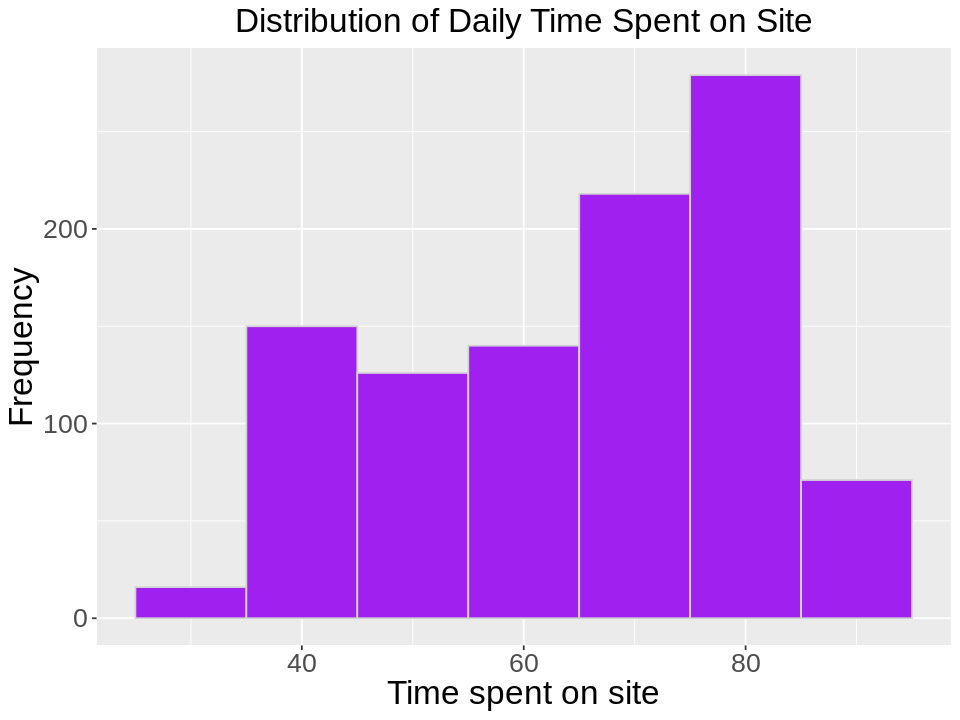

In [37]:
# Distribution of values in 'daily.time.spent.on.site' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data %>% ggplot(aes(x = daily.time.spent.on.site ))

p + geom_histogram(color="lightgray", fill="purple", binwidth = 10) +
    labs(title = "Distribution of Daily Time Spent on Site", x = "Time spent on site", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

Most time spent on site is around 80 minutes. 

**Age**

In [38]:
# computing the variance and standard deviation of the values in 'age' column
cat('Variance:',var(data$age), '\n')
cat('Standard Deviation:',sd(data$age))

Variance: 77.18611 
Standard Deviation: 8.785562

In [39]:
# computing the range, and the minimum and maximum values in 'age' column
cat("The minimum age of an is:", min(data$age),'years', '\n')
cat("The maximum age of is:", max(data$age),'years', '\n')
cat("Range of values is between:", range(data$age))

The minimum age of an is: 19 years 
The maximum age of is: 61 years 
Range of values is between: 19 61

In [40]:
# computing the skewness and kurtosis of values in the 'age' column
cat("Skewness: ", skewness(data$age), '\n')
cat("Kurtosis: ", kurtosis(data$age), '\n')

Skewness:  0.4784227 
Kurtosis:  2.595482 


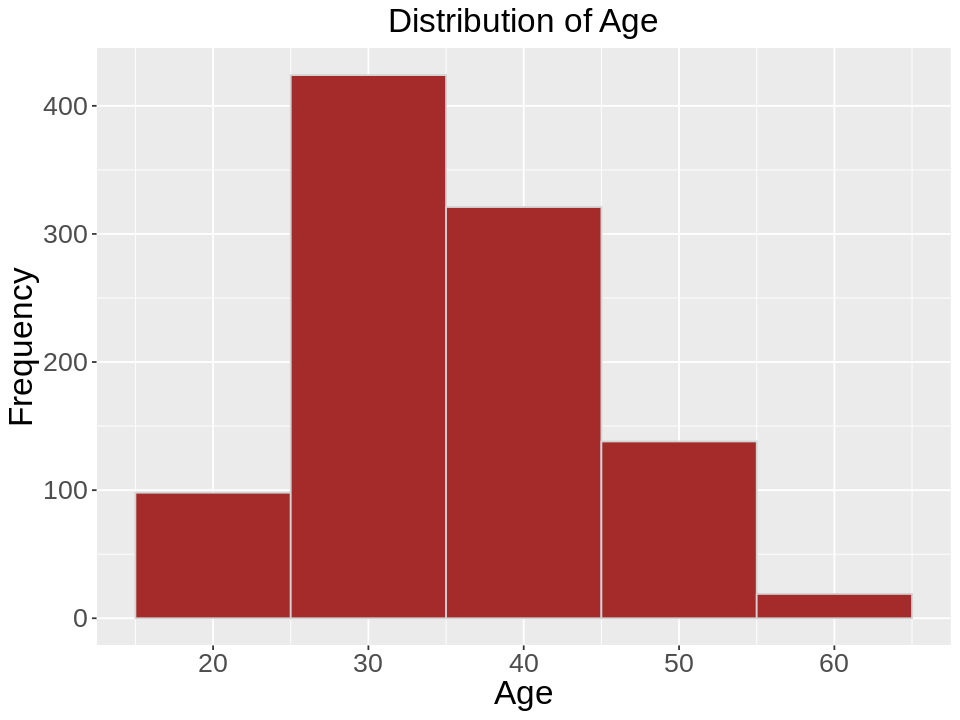

In [41]:
# visualizing the distribution of values in 'age' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data %>% ggplot(aes(x = age ))

p + geom_histogram(color="lightgray", fill="brown", binwidth = 10) +
    labs(title = "Distribution of Age", x = "Age", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

The age group with the highest value is between 25 and 35 years.

In [44]:
# compute the quantiles and interquartile range of the values in the 'age' column 
quantile(data$age)


0%  25%  50%  75% 100% 
  19   29   35   42   61

**Area income**

In [45]:
# compute the variance and standard deviation of the values in 'area.income' column
cat('Variance:',var(data$area.income), '\n')
cat('Standard Deviation:',sd(data$area.income))

Variance: 179952406 
Standard Deviation: 13414.63

In [46]:
# compute the range, and the minimum and maximum values in 'area_income' column
cat("Minimum:", min(data$area.income),'Shillings', '\n')
cat("Maximum:", max(data$area.income),'Shillings', '\n')
cat('Range of values is between:', range(data$area.income),'Shillings')

Minimum: 13996.5 Shillings 
Maximum: 79484.8 Shillings 
Range of values is between: 13996.5 79484.8 Shillings

In [47]:
# compute the skewness and kurtosis of values in the 'area.income' column
cat("Skewness: ", skewness(data$area.income), '\n')
cat("Kurtosis: ", kurtosis(data$area.income), '\n')

Skewness:  -0.6493967 
Kurtosis:  2.894694 


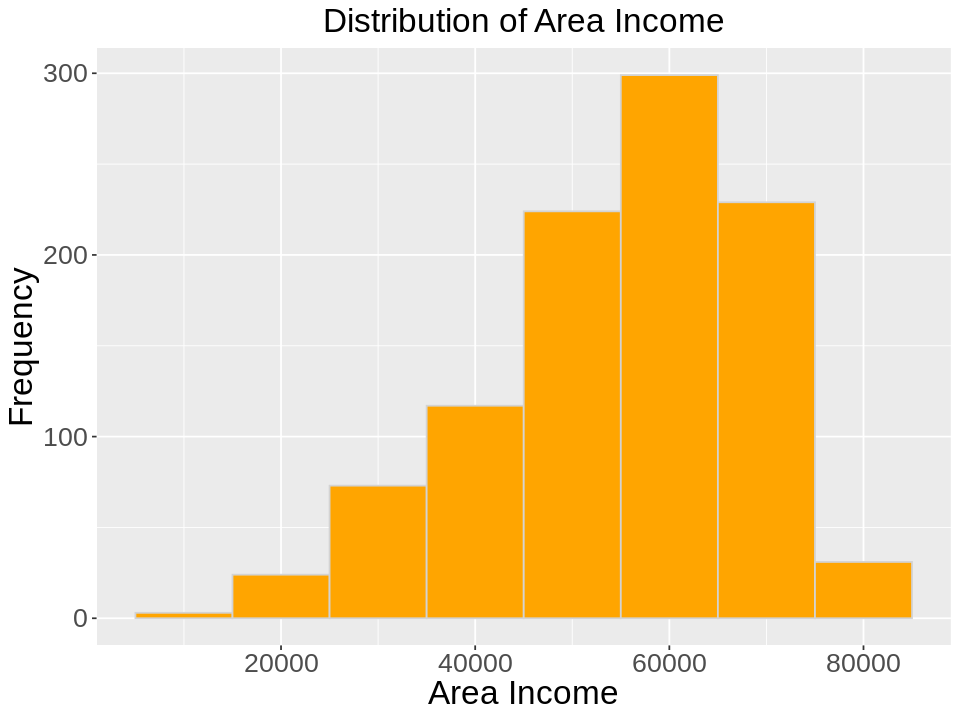

In [48]:
# visualizing the distribution of values in 'area.income' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data %>% ggplot(aes(x = area.income ))

p + geom_histogram(color="lightgray", fill="orange", binwidth = 10000) +
    labs(title = "Distribution of Area Income", x = "Area Income", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

In [49]:
# compute the quantiles and interquartile range of the values in the 'area_income' column 
quantile(data$area.income)


0%      25%      50%      75%     100% 
13996.50 47031.80 57012.30 65470.64 79484.80

**Daily internet usage**

In [50]:
# compute the variance and standard deviation of the values in 'daily_time_spent_on_site' column
cat('Variance:',var(data$daily.internet.usage), '\n')
cat('Variance:',sd(data$daily.internet.usage))

Variance: 1927.415 
Variance: 43.90234

In [51]:
# compute the range, and the minimum and maximum values in 'daily_internet_usage' column
cat("Minimum:", min(data$daily.internet.usage),'minutes', '\n')
cat("Maximum:", max(data$daily.internet.usage),'minutes', '\n')
cat('Range of the values is between:', range(data$daily.internet.usage),'minutes')

Minimum: 104.78 minutes 
Maximum: 269.96 minutes 
Range of the values is between: 104.78 269.96 minutes

In [52]:
# computing the skewness and kurtosis of values in the 'daily.internet.usage' column
cat("Skewness: ", skewness(data$daily.internet.usage), '\n')
cat("Kurtosis: ", kurtosis(data$daily.internet.usage), '\n')

Skewness:  -0.03348703 
Kurtosis:  1.727701 


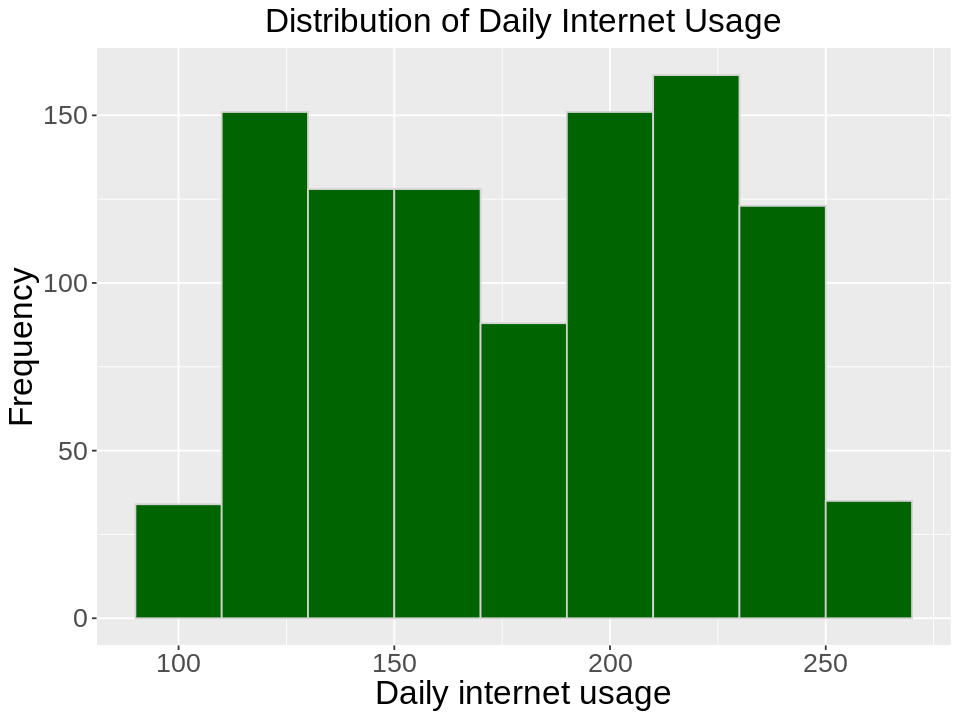

In [53]:
# visualizing the distribution of values in 'daily.internet.usage' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data %>% ggplot(aes(x = daily.internet.usage))

p + geom_histogram(color="lightgray", fill="darkgreen", binwidth = 20) +
    labs(title = "Distribution of Daily Internet Usage", x = "Daily internet usage", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

In [54]:
# compute the quantiles and interquartile range of the values in the 'daily_internet_usage' column 
quantile(data$daily.internet.usage)
cat('The interquartile range of age is:',IQR(data$daily.internet.usage))

0%      25%      50%      75%     100% 
104.7800 138.8300 183.1300 218.7925 269.9600

The interquartile range of age is: 79.9625

### Graphical Visualizations

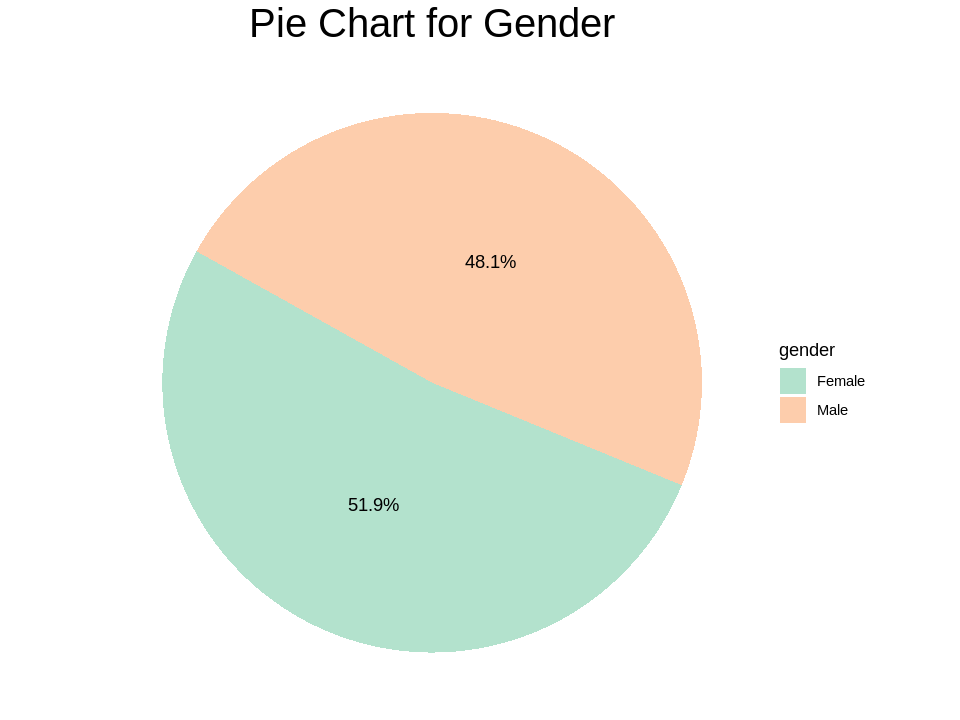

In [55]:
# plot a pie chart to visualize the proportion of values in the 'gender' column
data.gender = data %>% 
  filter(gender != "NA") %>% 
  group_by(gender) %>% 
  count() %>% 
  ungroup()%>% 
  arrange(desc(gender)) %>%
  mutate(percentage = round(n/sum(n),4)*100,
         lab.pos = cumsum(percentage)-.5*percentage)
ggplot(data = data.gender, 
       aes(x = "", y = percentage, fill = gender))+
  geom_bar(stat = "identity")+
  coord_polar("y", start = 200) +
  geom_text(aes(y = lab.pos, label = paste(percentage,"%", sep = "")), col = "black") +
  theme_void() + scale_fill_brewer(palette = "Pastel2") + labs(title= 'Pie Chart for Gender') + 
  theme(plot.title = element_text(hjust = 0.5, size = 24))


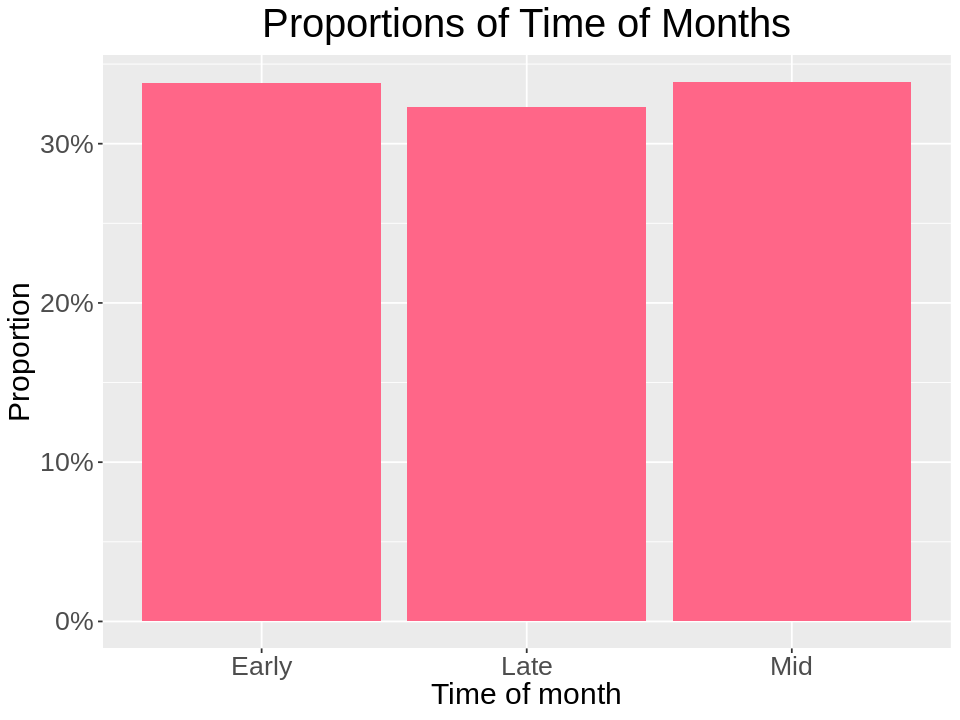

In [56]:
# visualizing online time per time of month 
ggplot(data, aes(time.of.month)) + 
        geom_bar(aes(y = (..count..)/sum(..count..)), fill = "#FF6688") + 
        scale_y_continuous(labels=scales::percent) +
        labs(title= 'Proportions of Time of Months', x='Time of month', y="Proportion") + 
        theme(axis.title = element_text(size = 18),
              axis.text = element_text(size=16),
              plot.title = element_text(hjust = 0.5, size = 24))


More individuals used the internet early and mid month than late in the month

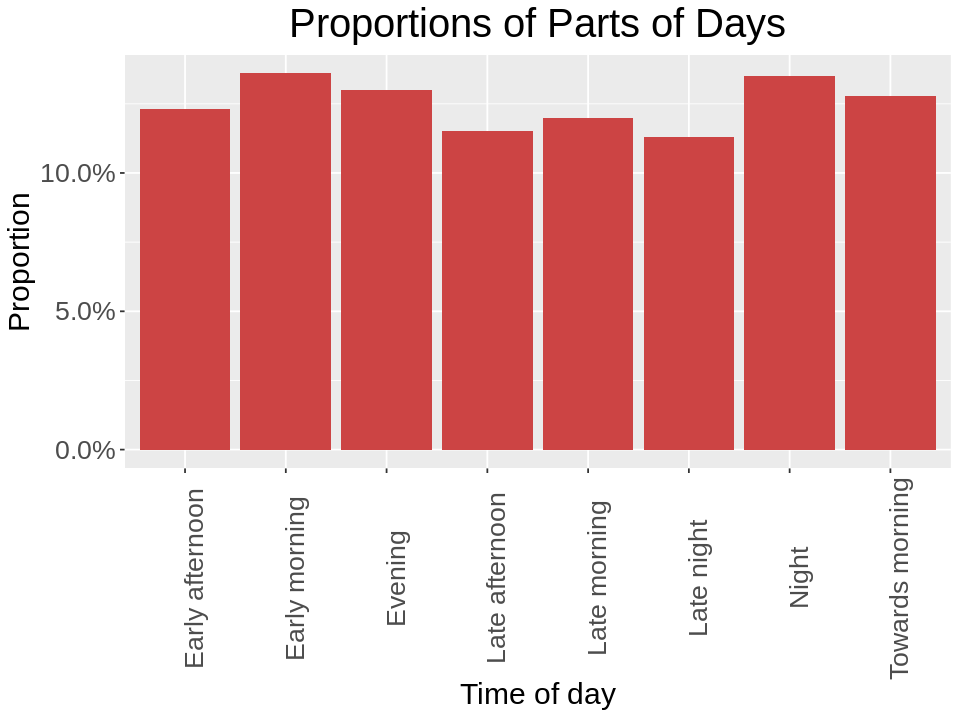

In [57]:
# plot a bar chart to visualize the proportion of values in 'part_of_day' column
ggplot(data, aes(time.of.day)) + 
        geom_bar(aes(y = (..count..)/sum(..count..)), fill = "#CC4444") + 
        scale_y_continuous(labels=scales::percent) +
        labs(title= 'Proportions of Parts of Days', x='Time of day', y="Proportion") + 
        theme(axis.title = element_text(size = 18),
              axis.text = element_text(size=16),
              plot.title = element_text(hjust = 0.5, size = 24), axis.text.x = element_text(angle = 90))


More individuals visited the site early in the morning and at night.

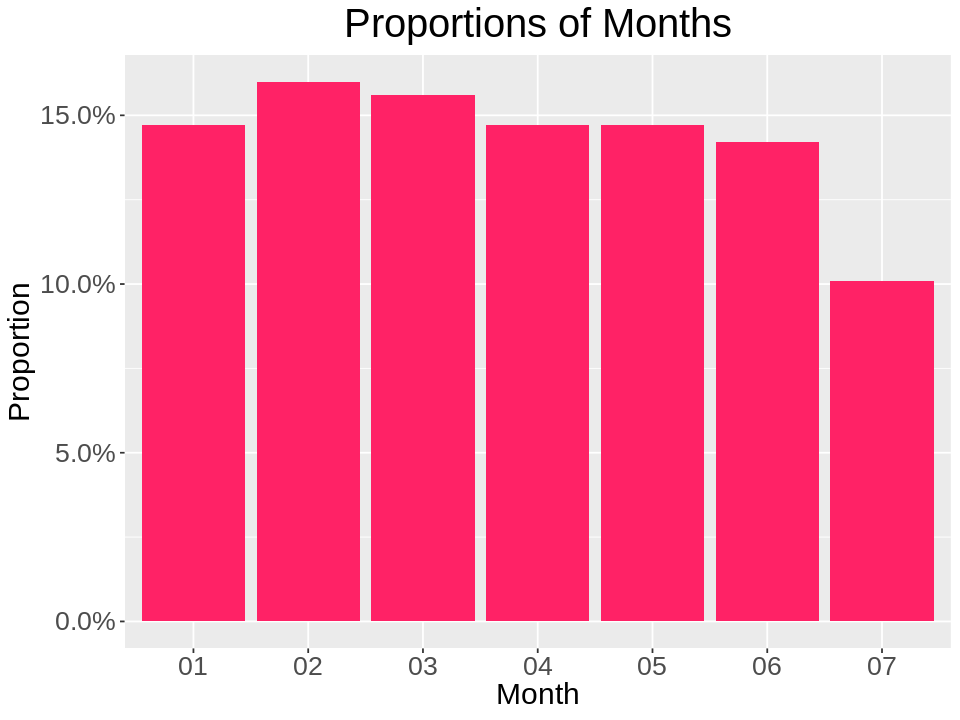

In [58]:
# plot a bar chart to visualize the proportion of values in 'month' column
ggplot(data, aes(month)) + 
        geom_bar(aes(y = (..count..)/sum(..count..)), fill = "#FF2266") + 
        scale_y_continuous(labels=scales::percent) +
        labs(title= 'Proportions of Months', x='Month', y="Proportion") + 
        theme(axis.title = element_text(size = 18),
              axis.text = element_text(size=16),
              plot.title = element_text(hjust = 0.5, size = 24))


The month with most visits was February while the one with least visits was July. 

In [59]:
# Frequncy table on the country column to get total no. of visits
data %>% count(country, sort = TRUE)

country,n
<chr>,<int>
Czech Republic,9
France,9
Afghanistan,8
Australia,8
Cyprus,8
Greece,8
Liberia,8
Micronesia,8
Peru,8


The countries with the most number of visits were Czech Republic and France. 

## Bivariate analysis  



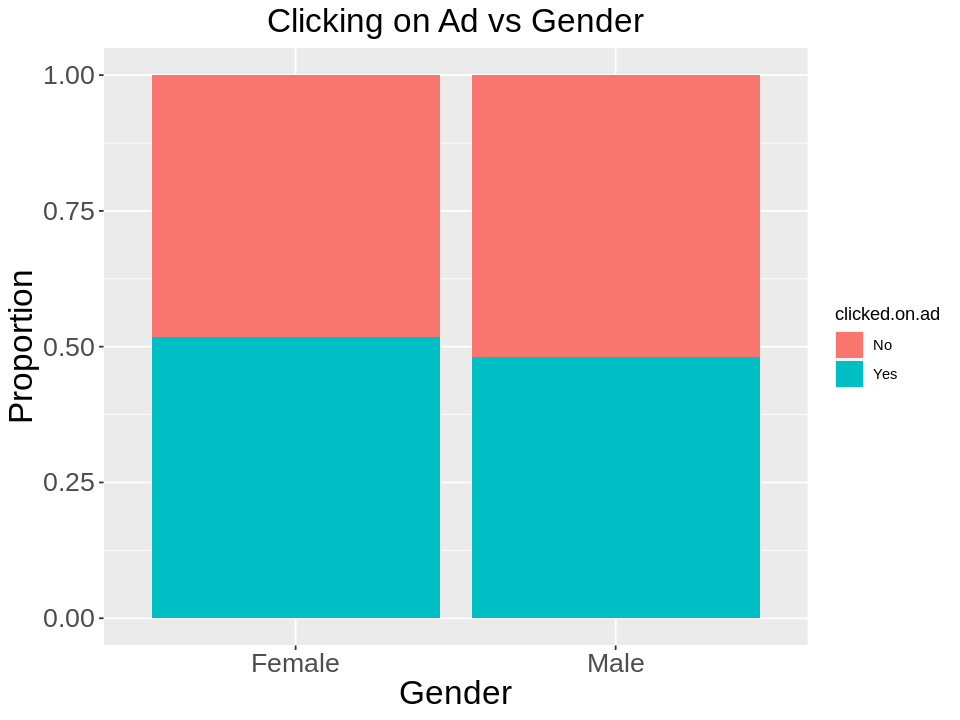

In [60]:
# plot a stacked bar chart to visualize the relationship between gender and clicking on the ad
ggplot(data, 
       aes(x = gender, 
           fill = clicked.on.ad)) + 
  geom_bar(position = "fill") +
    labs(title = "Clicking on Ad vs Gender", x = "Gender", y = "Proportion") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

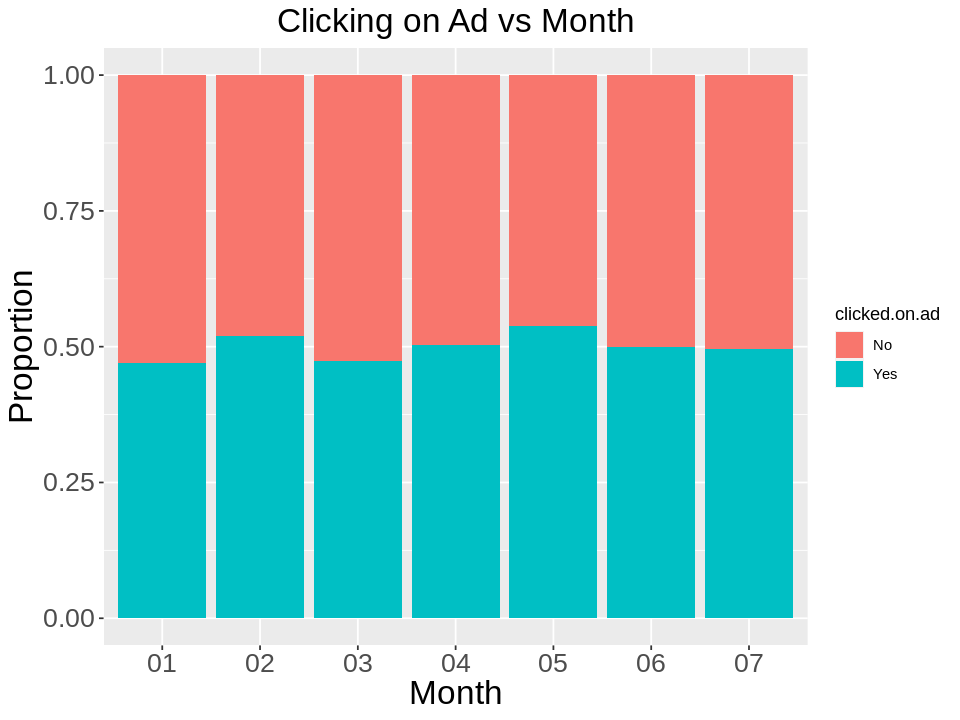

In [61]:
# plot a stacked bar chart to visualize the relationship between month and clicking on the ad
ggplot(data, 
       aes(x = month, 
           fill = clicked.on.ad)) +  
  geom_bar(position = "fill") +
    labs(title = "Clicking on Ad vs Month", x = "Month", y = "Proportion") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

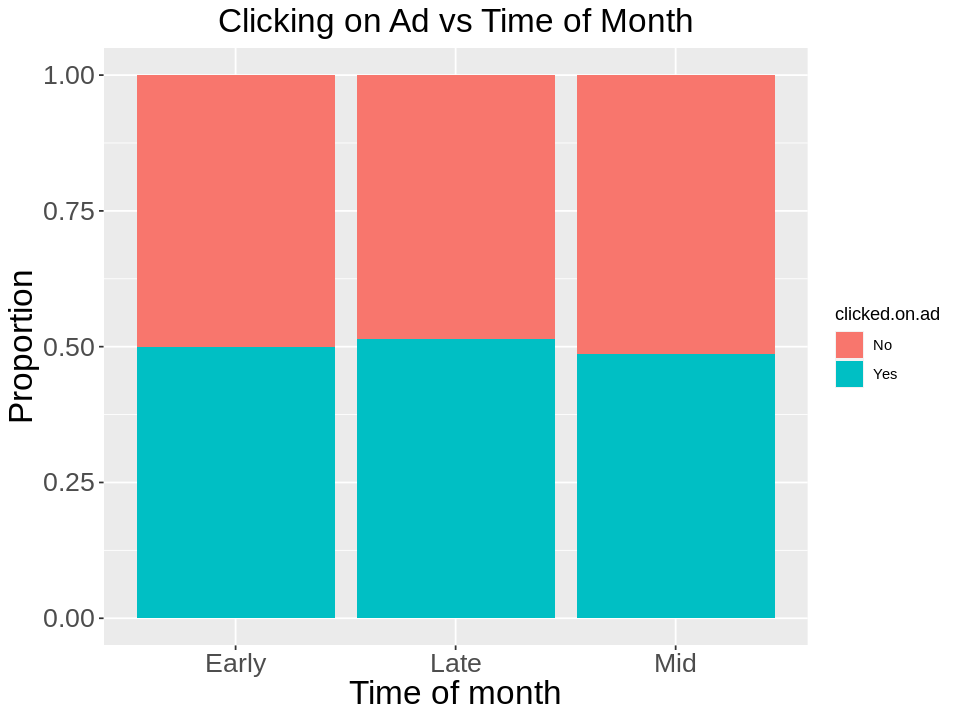

In [62]:
# plot a stacked bar chart to visualize the relationship between time of month and clicking on the ad
ggplot(data, 
       aes(x = time.of.month, 
           fill = clicked.on.ad)) + 
  geom_bar(position = "fill") +
    labs(title = "Clicking on Ad vs Time of Month", x = "Time of month", y = "Proportion") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

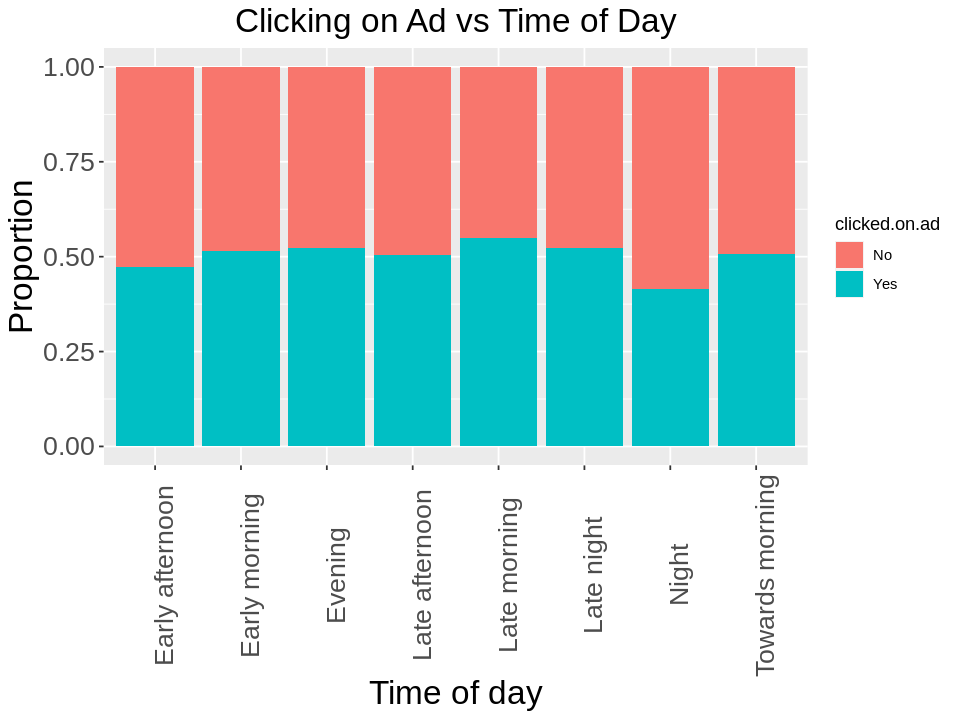

In [63]:
# stacked bar chart to visualize the relationship between time of day and clicking on the ad
ggplot(data, 
       aes(x = time.of.day, 
           fill = clicked.on.ad)) + 
  geom_bar(position = "fill") +
    labs(title = "Clicking on Ad vs Time of Day", x = "Time of day", y = "Proportion") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20), 
          axis.text.x = element_text(angle = 90))

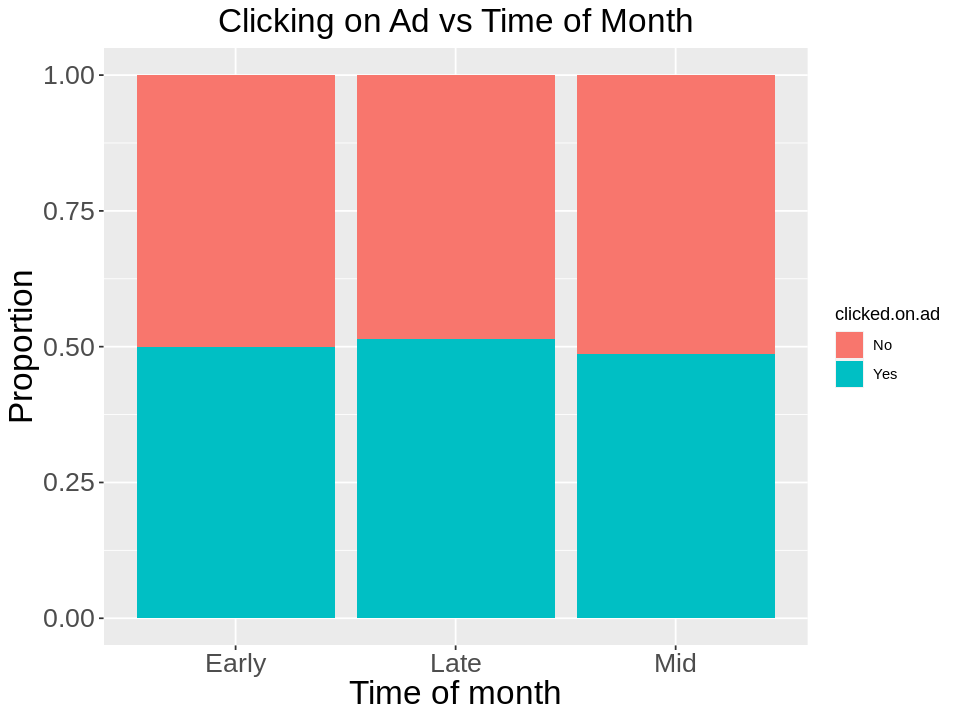

In [64]:
# stacked bar chart to visualize the relationship between time of month and clicking on the ad

ggplot(data, 
       aes(x = time.of.month, 
           fill = clicked.on.ad)) + 
  geom_bar(position = "fill") +
    labs(title = "Clicking on Ad vs Time of Month", x = "Time of month", y = "Proportion") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

**Pearson Correlation**

In [66]:
# identify numerical variables in the dataframe
num_col <- unlist(lapply(data, is.numeric))

# select and subset the numerical variables
data_num <- subset(data, select=num_col) 

# compute the correlations between the variables and display the correlation matrix
cor(data_num)

,daily.time.spent.on.site,age,area.income,daily.internet.usage
daily.time.spent.on.site,1.0000000,-0.3315133,0.3109544,0.5186585
age,-0.3315133,1.0000000,-0.1826050,-0.3672086
area.income,0.3109544,-0.1826050,1.0000000,0.3374955
daily.internet.usage,0.5186585,-0.3672086,0.3374955,1.0000000


Other than 'daily.time.spent.on.site' and 'daily.internet.usage', which are moderately correlated, the other variables have low or no correlation.

## Conclusions
* The proportion of females clicking on the ads is higher than the males', meaning that the ads were more appealing to the females more to the males.
* More than 50% of the individuals that visited the site in May and February clicked on the ads, while January and March had the fewest propotions of number of clicks.
* Most of the individuals visiting the site in the late morning hours clicked on the ads. A little bit over 50% of the individuals visiting the site in the early morning, evening and late night hours clicked on the ads.
* The median age of the individuals who did not click on the ads is 31.68 years while the median age of the individuals who clicked on the ads is 40.33 years; morever, the age of 50% of the individuals who clicked on the ads is between 34 years and 47 years while the age of 50% of the individuals who did not click on the ads is between 27 years and 36 years.




## Recommendations
* Since February recorded the highest views, the client should tailor more of the content in the other months of the year to be similar to the one she posted on February in order to increase views. 
* As much as the site is visited by more males than females, the ads are clicked on by more females than males. The client could create various ads that appeal to the genders differently so as to get more people click on the ads.
* Most of the individuals interested in cryptography do not spend a lot of time on the site or online; therefore, the client should tailor her sessions to take between 45 minutes to 60 minutes per day in order to capture her targeted audience. 
* The course content should be appealing to the individuals within the older age group brackets since they are the ones most interested in cryptography. 
* Since the area income of the individuals who are interested in cryptography is quite low, the price of course should be considerably low.


## Modelling

In [18]:
head(data, 2)

daily.time.spent.on.site,age,area.income,daily.internet.usage,gender,country,clicked.on.ad,month,time.of.month,time.of.day
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
68.95,35,61833.90,256.09,Female,Tunisia,0,03,Late,Late night
80.23,31,68441.85,193.77,Male,Nauru,0,04,Early,Late night


In [38]:
# encoding
data_model <- data 
data_model$time.of.month <- ifelse(data_model$time.of.month == "Early", 1,
              ifelse(data_model$time.of.month == "Mid", 2, 3))

# encode values in 'part_of_day' column
data_model$time.of.day <- ifelse(data_model$time.of.day == "Late night", 1,
              ifelse(data_model$time.of.day == "Towards morning", 2,
              ifelse(data_model$time.of.day == "Early morning", 3,
              ifelse(data_model$time.of.day == "Late morning", 4,
              ifelse(data_model$time.of.day == "Early afternoon", 5,
              ifelse(data_model$time.of.day == "Late afternoon", 6,
              ifelse(data_model$time.of.day == "Evening", 7,8)))))))

# change the data types of 'part_of_day' and 'part_of_month' columns to 'factor'
data_model <- transform(data_model, time.of.day=as.factor(time.of.day), time.of.month=as.factor(time.of.month))

# drop irrelevant columns
data_model <-data_model %>% select(-c(country, month))

# preview the first few records in the dataset
head(data_model)

daily.time.spent.on.site,age,area.income,daily.internet.usage,gender,clicked.on.ad,time.of.month,time.of.day
<dbl>,<int>,<dbl>,<dbl>,<chr>,<int>,<fct>,<fct>
68.95,35,61833.90,256.09,Female,0,3,1
80.23,31,68441.85,193.77,Male,0,1,1
69.47,26,59785.94,236.50,Female,0,2,7
74.15,29,54806.18,245.89,Male,0,1,1
68.37,35,73889.99,225.58,Female,0,1,2
59.99,23,59761.56,226.74,Male,0,2,5


In [20]:
# Importing the needed libraries

install.packages("caTools")
library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [39]:
# split the data into train and test sets
set.seed(32)
split = sample.split(data_model$clicked.on.ad, SplitRatio = .70) # the training set will contain 70% of the data and test set will contain the remaining 30%
train = subset(data_model, split == TRUE)
test  = subset(data_model, split == FALSE)


### Random Forest

In [22]:
install.packages('caret')
library(caret)
install.packages('e1071')
library(e1071)
install.packages('ranger')
library(ranger)
install.packages('kernlab')
library(kernlab)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘e1071’


The following objects are masked from ‘package:moments’:

    kurtosis, moment, skewness


The following object is masked from ‘package:modeest’:

    skewness


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘kernlab’


The

In [40]:
# grid search for optimal parameters 
model <- train(clicked.on.ad ~., data = train, method = "ranger",
                    trControl=trainControl(method = "repeatedcv", number = 10, repeats =5),
                    preProcess = c("center", "scale"),
                    tuneLength = 10)

Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”


In [43]:
model

Random Forest 

700 samples
  7 predictor

Pre-processing: centered (14), scaled (14) 
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 630, 630, 630, 630, 630, 630, ... 
Resampling results across tuning parameters:

  mtry  splitrule   RMSE       Rsquared   MAE       
   2    variance    0.2144209  0.8469063  0.15782277
   2    extratrees  0.2564257  0.8410687  0.22717745
   3    variance    0.1938623  0.8562946  0.11332947
   3    extratrees  0.2089182  0.8562450  0.15386101
   4    variance    0.1876183  0.8602267  0.09604820
   4    extratrees  0.1941923  0.8621139  0.12403910
   6    variance    0.1852808  0.8605188  0.08162643
   6    extratrees  0.1847265  0.8667976  0.10104019
   7    variance    0.1856835  0.8592652  0.07819059
   7    extratrees  0.1827751  0.8679409  0.09539274
   8    variance    0.1866108  0.8576080  0.07584231
   8    extratrees  0.1818710  0.8682086  0.09156995
  10    variance    0.1881687  0.8547428  0.07321951
  10    

In [60]:
# Making predictions using our test data

pred <- predict(model, test, type="raw")

**Linear**

In [ ]:
# cross validate the optimal hyperparameter values and train the svm linear model 
model_linear <- train(clicked_on_ad ~., data = train, method = "svmLinear",
                    trControl=trainControl(method = "repeatedcv", number = 10, repeats =5),
                    preProcess = c("center", "scale"),
                    tuneLength = 10)

In [34]:
# cross validate the optimal hyperparameter values and train the svm linear model 
model_linear <- train(clicked.on.ad ~., data = train, method = "svmLinear",
                    trControl=trainControl(method = "repeatedcv", number = 10, repeats =5),
                    preProcess = c("center", "scale"),
                    tuneLength = 10)

Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”


In [36]:
# make predictions of the results of the test data using the trained svm linear model
pred_linear = predict(model_linear, newdata=test)